In [1]:
import tensorflow as tf
import numpy as np
import bilby
import os
import sys
import json
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.signal as signal
import corner
import random
import copy
import time
model_dir = "/home/joseph.bayley/public_html/CBC/vitamin_O4MDC/BBH_1024.0Hz_1s_fullparam_massconstrain_corr/vitamin_basic_run0_1024_1s_4conv128_64_32_16_jointm1m2_ramp400_noregularization_AdamW_notimeaug_m1m2_batchnorm"
sys.path.append(model_dir)
from vitamin_c_model_fit import CVAE
sys.path.append("../vitamin_c")
from load_data_fit import DataLoader
from vitamin_c_fit import plot_posterior, get_params
import h5py

/home/joseph.bayley/.conda/envs/vitc_newkeras/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
%matplotlib inline

In [3]:
test_dir = "/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam_massconstrain_corr/test_waveforms"
load_dir = "/home/joseph.bayley/data/CBC/O4MDC/training_sets_realnoise_2det_15par_1024Hz_1s_fullparam_massconstrain_corr/tset_tot-10000000_split-1000"

In [4]:
params_dir = "../vitamin_c/params_files_1024_1s_corrected"
params = os.path.join(params_dir, 'params.json')
bounds = os.path.join(params_dir, 'bounds.json')
fixed_vals = os.path.join(params_dir, 'fixed_vals.json')

with open(params, 'r') as fp:
    params = json.load(fp)
with open(bounds, 'r') as fp:
    bounds = json.load(fp)
with open(fixed_vals, 'r') as fp:
    fixed_vals = json.load(fp)

In [5]:
params, bounds, masks, fixed_vals = get_params(params, bounds, fixed_vals, params_dir = params_dir)

... converted RA bounds to hour angle
[False, False, True, False, False, False, False, False, False, False, False, False, False, True, True]
[True, True, False, True, True, True, True, True, True, True, True, True, True, False, False]
[ 3  4  0  5  6  7  8  9 10 11 12 13 14  1  2]
['mass_1', 'mass_2', 'luminosity_distance', 'geocent_time', 'phase', 'theta_jn', 'psi', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'ra', 'dec']
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] []
[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True] [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False] [0]
[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False] [1]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [9]:
dt = DataLoader(load_dir, params = params, bounds = bounds, fixed_vals = fixed_vals, masks=masks,test_set = False, chunk_batch = 10)

In [10]:
dt.load_next_chunk()

datashape (6,) (6,)
load_time chunk 0: 1.6011056900024414


In [8]:
dt.Y_noisefree

<tf.Tensor: shape=(1024, 1024, 2), dtype=float32, numpy=
array([[[-3.39166485e-02,  4.86925542e-02],
        [-7.53342882e-02, -4.60061207e-02],
        [ 7.72041082e-02, -5.48074581e-02],
        ...,
        [ 9.95925348e-03, -2.77345981e-02],
        [ 1.49760405e-02, -1.25651151e-01],
        [ 2.83009019e-02,  4.78164433e-03]],

       [[-2.43261717e-02, -2.03709733e-02],
        [ 4.45895270e-02,  2.14785300e-02],
        [-3.28254737e-02, -7.74945468e-02],
        ...,
        [-8.91826581e-03, -1.10276684e-01],
        [-1.73616968e-02, -3.59167829e-02],
        [ 5.59822395e-02,  5.04864790e-02]],

       [[ 6.54581860e-02, -5.04962355e-02],
        [ 3.05849910e-02, -1.21917306e-04],
        [-5.84124662e-02, -2.13201065e-03],
        ...,
        [-4.96346094e-02, -1.19475815e-02],
        [-1.66389644e-02,  1.16458282e-01],
        [ 4.82612513e-02, -2.20379680e-02]],

       ...,

       [[-2.73258202e-02, -8.49151388e-02],
        [-5.66529073e-02,  2.89430972e-02],
     

In [7]:
model = CVAE(params, bounds, masks)
    
# load in trained model
print("loading model weights....")
latest = tf.train.latest_checkpoint(os.path.join(model_dir,"checkpoint"))
model.load_weights(latest)
    

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 2)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 993, 128)          8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 993, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 993, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 978, 64)           131136    
_________________________________________________________________
batch_normalization_1 (Batch (None, 978, 64)           256       
_________________________________________________________________
activation_1 (Activation)    (None, 978, 64)           0     

In [20]:
np.where(dt.X[:,1] < 0.2)

(array([  37,   66,   73,   77,  123,  134,  163,  166,  172,
         219,  254,  349,  410,  432,  441,  444,  484,  487,
         495,  506,  524,  528,  533,  535,  615,  622,  638,
         655,  671,  678,  706,  709,  753,  782,  787,  791,
         795,  839,  841,  886,  901,  927,  957,  984, 1001,
        1014]),)

In [23]:
ind = 37

In [49]:
dt.X[ind,0:2]*90 + 10

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([48.246338, 27.415497], dtype=float32)>

In [21]:
print("generating samples....")

samples1 = model.gen_samples(dt.Y_noisefree[ind:ind+1], nsamples = 5000)


generating samples....


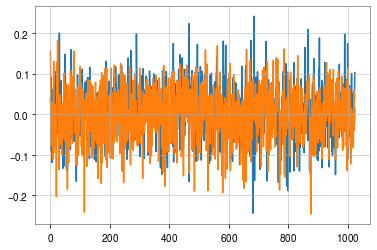

In [48]:
fig, ax = plt.subplots()
ax.plot(dt.Y_noisefree[ind:ind+1][0][:,0])
ax.plot(dt.Y_noisefree[ind:ind+1][0][:,1])

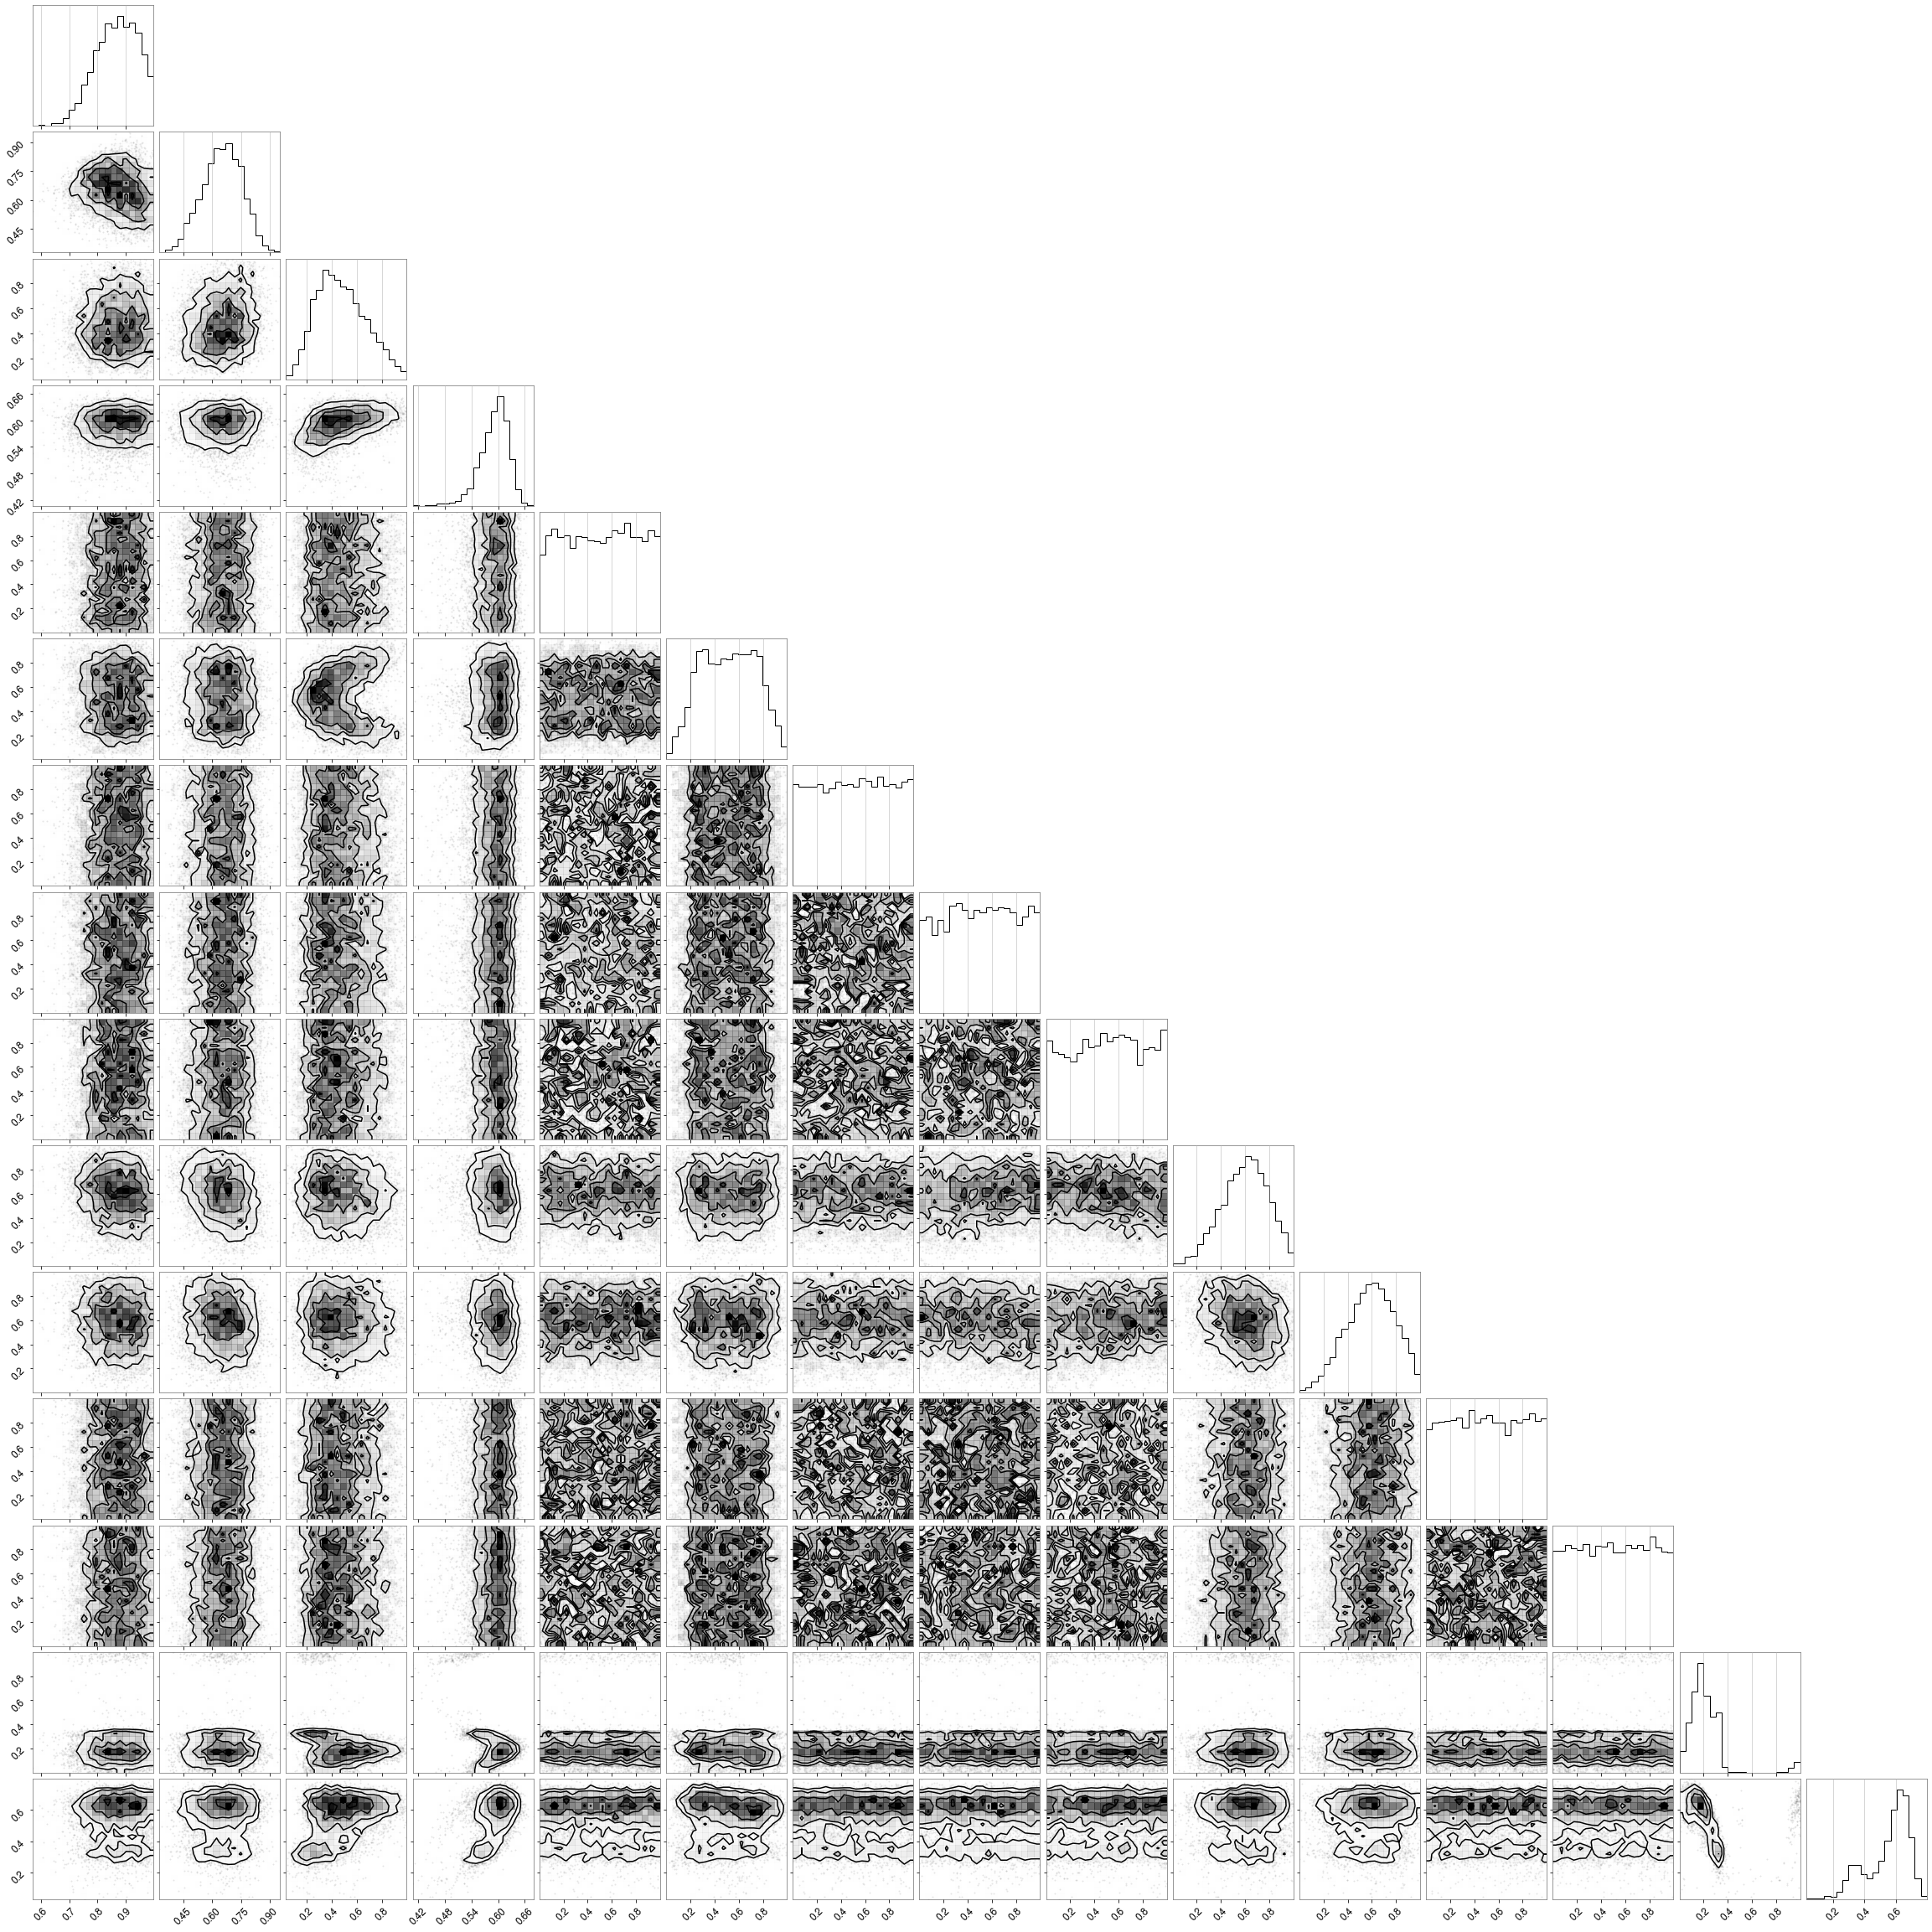

In [15]:
corner.corner(np.array(samples1))

In [57]:
filename = "/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam_massconstrain_corr/test_dynesty2/1024Hz_1s_full_15par_2det_fullparam_corr_0_result.hdf5"

In [63]:
fl = h5py.File(filename, 'r')

In [65]:
fl['posterior'].keys()

<KeysViewHDF5 ['a_1', 'a_2', 'dec', 'geocent_time', 'log_likelihood', 'log_prior', 'luminosity_distance', 'mass_1', 'mass_2', 'phase', 'phi_12', 'phi_jl', 'psi', 'ra', 'theta_jn', 'tilt_1', 'tilt_2']>

In [67]:
pst = {}
for q in params['bilby_pars']:
    p = q 
    pst[q] = fl['posterior'][p][:]

In [68]:
pst

{'mass_1': array([99.87341755, 75.0739827 , 96.19294706, ..., 97.27228752,
        98.43156841, 98.43156841]),
 'mass_2': array([80.7183982 , 45.1899404 , 77.4118926 , ..., 92.02850275,
        94.69417067, 94.69417067]),
 'luminosity_distance': array([4136.39564699, 3655.06474625, 4164.73466073, ...,
        2294.37876281, 1473.0676786 , 1473.0676786 ]),
 'geocent_time': array([1.32502927e+09, 1.32502927e+09, 1.32502927e+09, ...,
        1.32502927e+09, 1.32502927e+09, 1.32502927e+09]),
 'theta_jn': array([1.30517615, 0.96879756, 1.92840379, ..., 1.17423936,
        1.17086964, 1.17086964]),
 'psi': array([1.86636687, 2.02797313, 0.41830281, ..., 2.69309391,
        0.06290568, 0.06290568]),
 'a_1': array([0.841127  , 0.52367584, 0.11903274, ..., 0.85929979,
        0.75173021, 0.75173021]),
 'a_2': array([0.23355202, 0.30962137, 0.93515613, ..., 0.89014979,
        0.86015958, 0.86015958]),
 'tilt_1': array([2.62424457, 0.81193447, 1.8989431 , ..., 2.61555847,
        1.65969625, 1.6